In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data = pd.read_csv(
    'data/household_power_consumption.txt',
    sep=';'
)

data.insert(0, 'Datetime', pd.to_datetime(data['Date'] + ' ' + data['Time'],  dayfirst=True))
data.drop(['Date', 'Time'], axis=1, inplace=True)

variables = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
for col in variables:
    data[col] = pd.to_numeric(data[col], errors = 'coerce')

/var/folders/2v/gfm3z1tn5fj8zss_r9hrgnv80000gn/T/ipykernel_75554/2663254609.py:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(


In [7]:
display(data.head())
display(data.info())

,Datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 8 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Datetime               datetime64[ns]
 1   Global_active_power    float64       
 2   Global_reactive_power  float64       
 3   Voltage                float64       
 4   Global_intensity       float64       
 5   Sub_metering_1         float64       
 6   Sub_metering_2         float64       
 7   Sub_metering_3         float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 126.7 MB


None

In [8]:
data.isna()

,Datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
2075254,False,False,False,False,False,False,False,False
2075255,False,False,False,False,False,False,False,False
2075256,False,False,False,False,False,False,False,False
2075257,False,False,False,False,False,False,False,False


In [9]:
data[data.isna()]

,Datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2075254,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2075255,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2075256,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2075257,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
data_sub = data.iloc[0:1000, :]

In [16]:
data_sub.head(1)

,Datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0


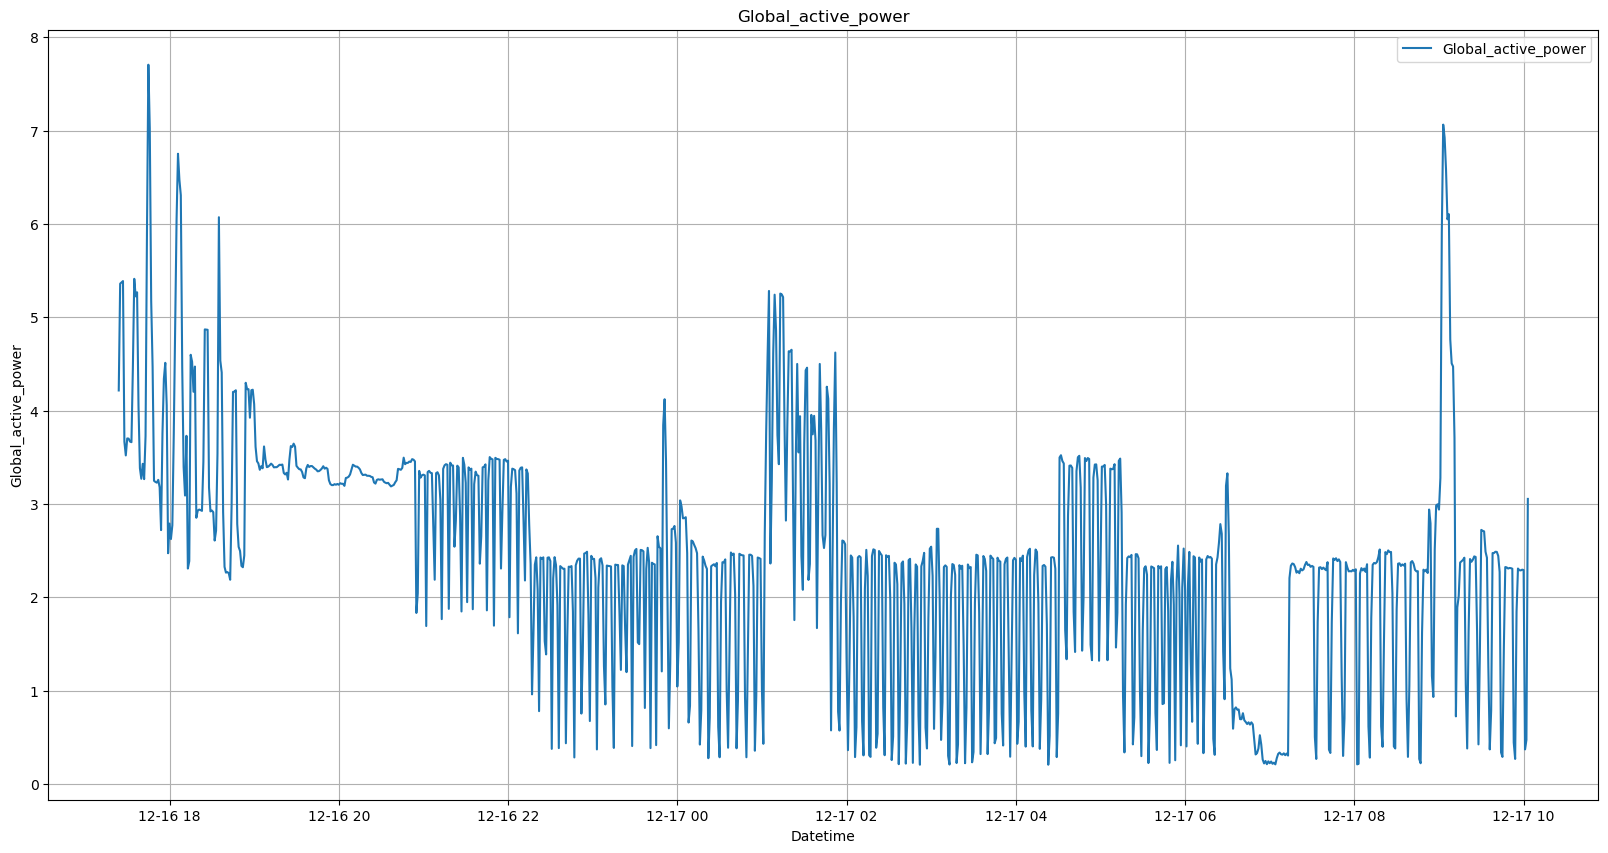

In [15]:
plt.figure(figsize=(20, 10))
sns.lineplot(x='Datetime', y="Global_active_power", data=data_sub, label="Global_active_power") 
plt.title("Global_active_power")
plt.grid(True)
plt.legend()

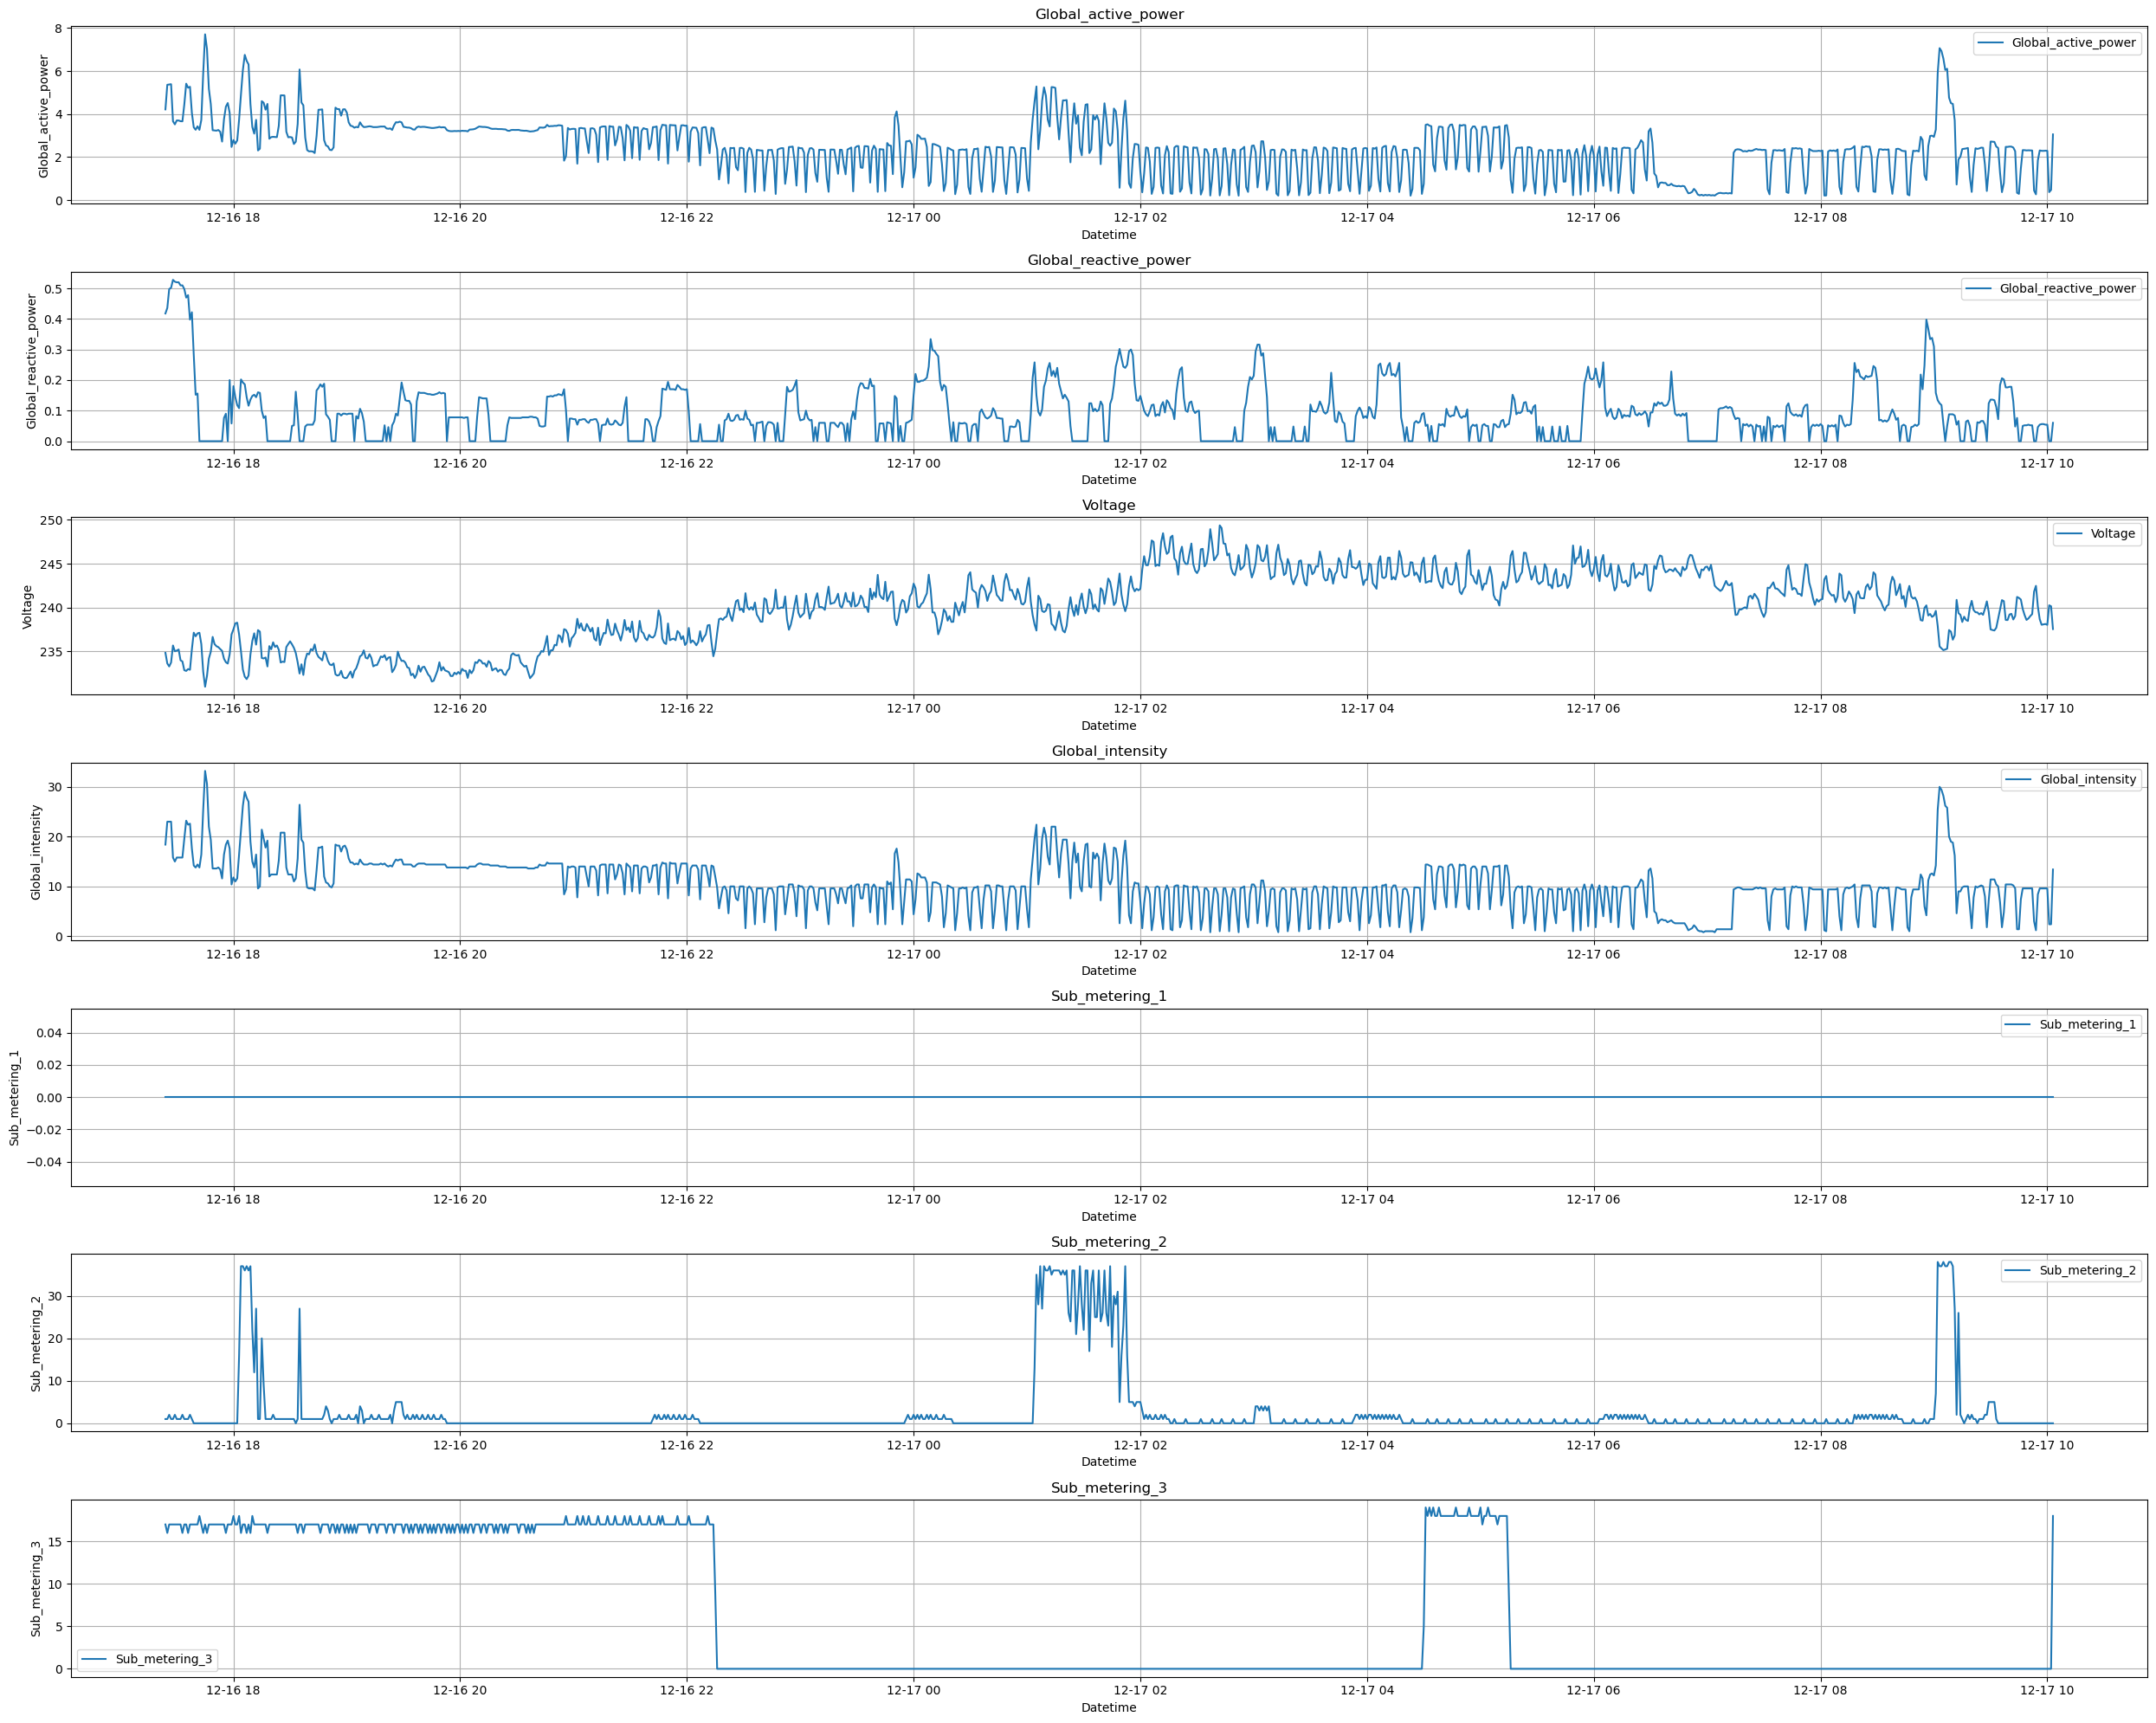

In [18]:
plt.figure(figsize=(25, 20))

for i, var in enumerate(variables):
    plt.subplot(len(variables), 1, i + 1)
    sns.lineplot(x='Datetime', y=var, data=data_sub, label=var) 
    plt.title(var)
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.show()

In [55]:
data.set_index('Datetime', inplace=True)

In [62]:
# Resample data to daily frequency and compute mean
daily_averages = data.resample('H').mean()  # 'D' stands for daily

display(daily_averages.head())  # Display the first few entries of the daily averages

daily_averages

/var/folders/2v/gfm3z1tn5fj8zss_r9hrgnv80000gn/T/ipykernel_60054/4248252608.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  daily_averages = data.resample('H').mean()  # 'D' stands for daily


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Datetime,,,,,,,
2006-12-16 17:00:00,4.222889,0.229000,234.643889,18.100000,0.0,0.527778,16.861111
2006-12-16 18:00:00,3.632200,0.080033,234.580167,15.600000,0.0,6.716667,16.866667
2006-12-16 19:00:00,3.400233,0.085233,233.232500,14.503333,0.0,1.433333,16.683333
2006-12-16 20:00:00,3.268567,0.075100,234.071500,13.916667,0.0,0.000000,16.783333
2006-12-16 21:00:00,3.056467,0.076667,237.158667,13.046667,0.0,0.416667,17.216667


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Datetime,,,,,,,
2006-12-16 17:00:00,4.222889,0.229000,234.643889,18.100000,0.0,0.527778,16.861111
2006-12-16 18:00:00,3.632200,0.080033,234.580167,15.600000,0.0,6.716667,16.866667
2006-12-16 19:00:00,3.400233,0.085233,233.232500,14.503333,0.0,1.433333,16.683333
2006-12-16 20:00:00,3.268567,0.075100,234.071500,13.916667,0.0,0.000000,16.783333
2006-12-16 21:00:00,3.056467,0.076667,237.158667,13.046667,0.0,0.416667,17.216667
...,...,...,...,...,...,...,...
2010-11-26 17:00:00,1.725900,0.061400,237.069667,7.216667,0.0,0.000000,12.866667
2010-11-26 18:00:00,1.573467,0.053700,237.531833,6.620000,0.0,0.000000,0.000000
2010-11-26 19:00:00,1.659333,0.060033,236.741000,7.056667,0.0,0.066667,0.000000


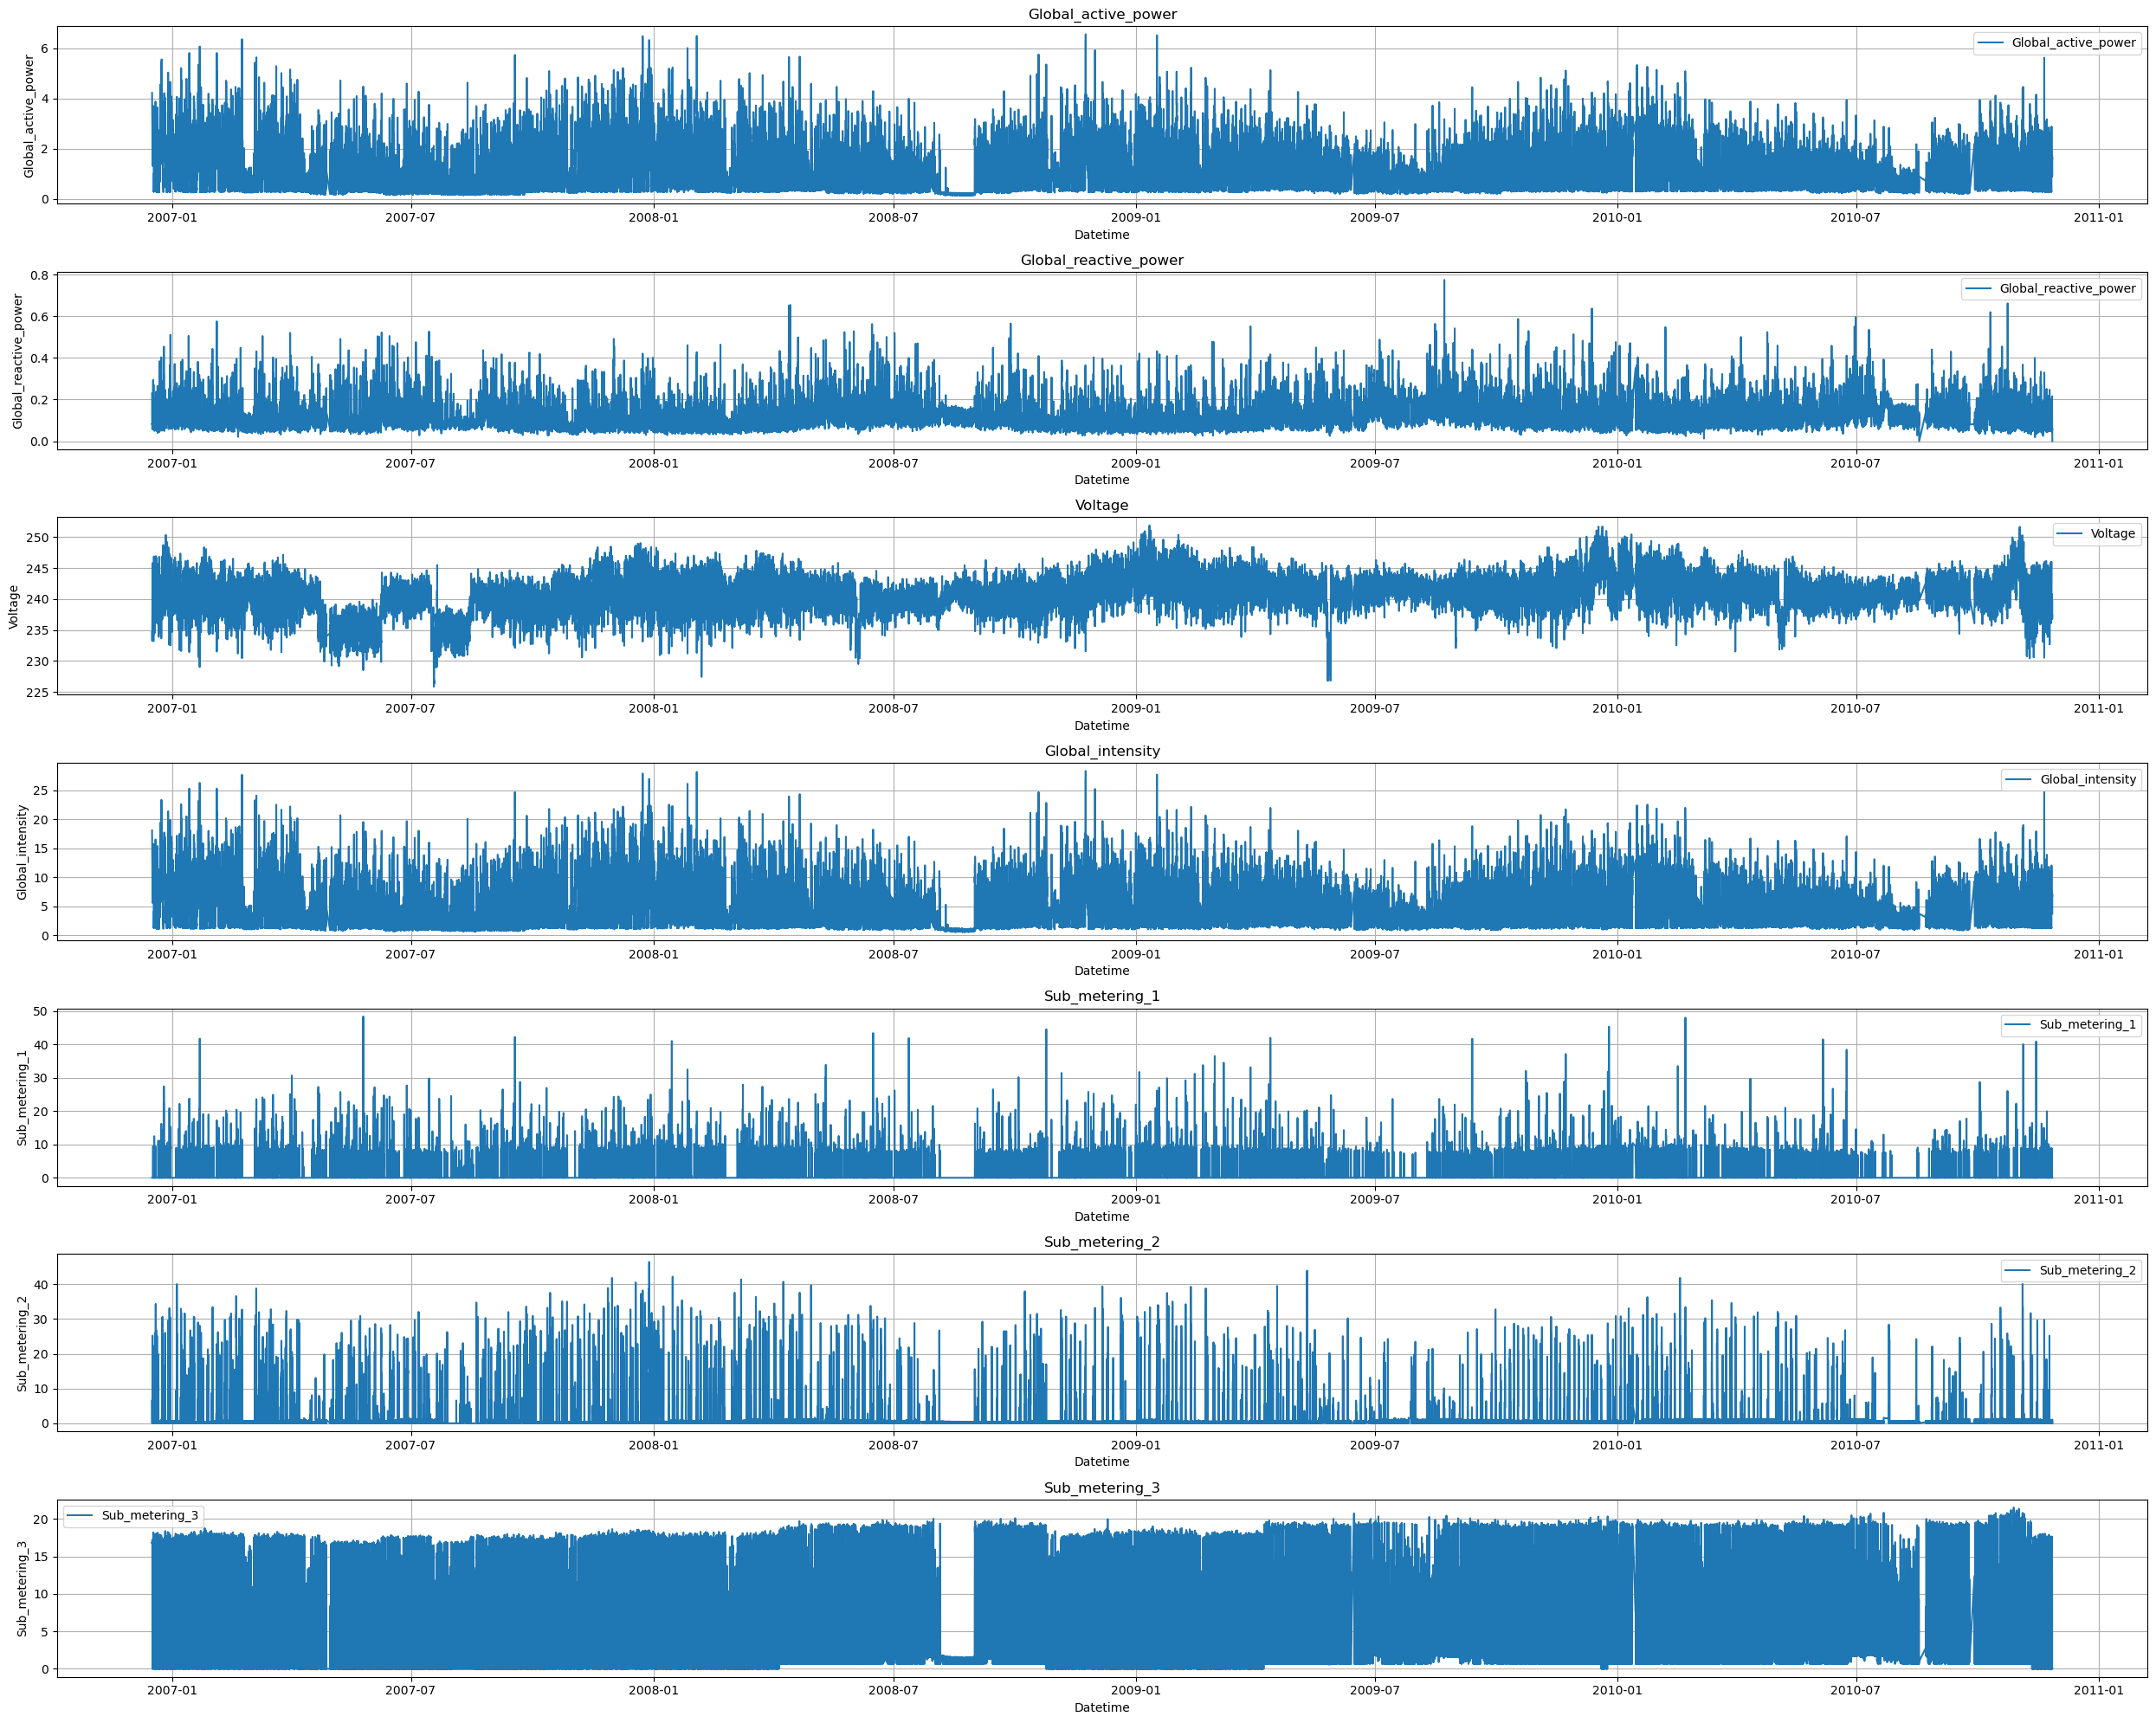

In [63]:
plt.figure(figsize=(25, 20))

for i, var in enumerate(variables):
    plt.subplot(len(variables), 1, i + 1)
    sns.lineplot(x='Datetime', y=var, data=daily_averages, label=var) 
    plt.title(var)
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.show()

In [130]:
data = pd.read_csv(
    'historic_demand_year_2023.csv'
)

In [131]:
data

,settlement_date,settlement_period,nd,tsd,england_wales_demand,embedded_wind_generation,embedded_wind_capacity,embedded_solar_generation,embedded_solar_capacity,non_bm_stor,...,scottish_transfer,ifa_flow,ifa2_flow,britned_flow,moyle_flow,east_west_flow,nemo_flow,nsl_flow,eleclink_flow,viking_flow
0,2023-01-01,1,21043,24680,18995,2815,6545,0,15005,0,...,1194,609,903,-896,-451,-529,253,235,998,0
1,2023-01-01,2,21756,25289,19730,2793,6545,0,15005,0,...,1191,596,904,-897,-451,-529,252,157,998,0
2,2023-01-01,3,21348,25269,19327,2773,6545,0,15005,0,...,969,516,983,-910,-451,-529,253,-219,999,0
3,2023-01-01,4,20586,24574,18589,2753,6545,0,15005,0,...,667,510,989,-911,-413,-529,254,-298,999,0
4,2023-01-01,5,19781,24135,17806,2712,6545,0,15005,0,...,387,600,903,-912,-401,-529,253,-679,998,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17515,2023-12-31,44,25269,25921,22546,2707,6488,0,15905,0,...,-535,1879,-4,907,23,0,999,1334,997,601
17516,2023-12-31,45,24254,24977,21608,2734,6488,0,15905,0,...,-336,1154,-4,1002,111,0,999,960,997,601
17517,2023-12-31,46,23455,24134,20889,2761,6488,0,15905,0,...,-256,1085,-5,1003,130,0,999,884,998,599
17518,2023-12-31,47,22533,23714,20081,2767,6488,0,15905,0,...,-30,475,-4,801,71,-63,999,512,998,512


In [132]:
data['settlement_date'] = pd.to_datetime(data['settlement_date'])

In [133]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17520 entries, 0 to 17519
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   settlement_date            17520 non-null  datetime64[ns]
 1   settlement_period          17520 non-null  int64         
 2   nd                         17520 non-null  int64         
 3   tsd                        17520 non-null  int64         
 4   england_wales_demand       17520 non-null  int64         
 5   embedded_wind_generation   17520 non-null  int64         
 6   embedded_wind_capacity     17520 non-null  int64         
 7   embedded_solar_generation  17520 non-null  int64         
 8   embedded_solar_capacity    17520 non-null  int64         
 9   non_bm_stor                17520 non-null  int64         
 10  pump_storage_pumping       17520 non-null  int64         
 11  scottish_transfer          17520 non-null  int64         
 12  ifa_

In [124]:
data.set_index('settlement_date', inplace=True)

In [125]:
hourly_averages = data.resample('D').mean()  # 'D' stands for daily
hourly_averages

,settlement_period,nd,tsd,england_wales_demand,embedded_wind_generation,embedded_wind_capacity,embedded_solar_generation,embedded_solar_capacity,non_bm_stor,pump_storage_pumping,...,ifa_flow,ifa2_flow,britned_flow,moyle_flow,east_west_flow,nemo_flow,nsl_flow,eleclink_flow,viking_flow,date
settlement_date,,,,,,,,,,,,,,,,,,,,,
2023-01-01,24.5,24189.979167,26566.395833,21584.791667,1733.208333,6545.0,224.854167,15005.020833,0.0,411.104167,...,912.770833,967.604167,280.041667,-349.291667,-365.000000,581.687500,318.833333,993.687500,0.000000,2023-01-01
2023-01-02,24.5,27005.520833,27992.000000,24540.187500,1122.416667,6545.0,672.291667,15006.062500,0.0,178.437500,...,713.645833,766.312500,881.458333,-60.958333,75.729167,897.041667,1115.750000,995.833333,0.000000,2023-01-02
2023-01-03,24.5,29646.312500,31016.145833,27533.062500,2927.687500,6545.0,85.062500,15009.062500,0.0,270.000000,...,449.812500,419.166667,622.875000,-4.354167,17.958333,563.291667,316.562500,633.625000,0.000000,2023-01-03
2023-01-04,24.5,27967.145833,30195.791667,25864.270833,3670.312500,6545.0,307.479167,15012.062500,0.0,400.354167,...,431.375000,443.979167,383.000000,-79.479167,10.791667,532.562500,423.604167,650.312500,0.000000,2023-01-04
2023-01-05,24.5,29392.500000,31058.166667,27098.354167,2528.229167,6545.0,210.666667,15015.062500,0.0,297.395833,...,528.125000,121.604167,406.541667,-0.708333,-65.041667,393.104167,403.770833,455.520833,0.000000,2023-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,24.5,25385.958333,28008.187500,23668.916667,4401.583333,6488.0,37.625000,15905.000000,0.0,476.520833,...,528.875000,-4.187500,-314.333333,-46.270833,148.479167,180.062500,262.708333,383.645833,0.000000,2023-12-27
2023-12-28,24.5,25081.229167,27992.687500,23355.562500,4715.250000,6488.0,285.062500,15905.000000,0.0,465.520833,...,623.645833,-4.000000,16.979167,307.041667,41.187500,383.520833,-642.562500,524.562500,0.000000,2023-12-28
2023-12-29,24.5,26254.895833,28972.166667,23774.916667,3386.458333,6488.0,353.895833,15905.000000,0.0,453.604167,...,910.333333,-4.000000,438.645833,-250.666667,-323.625000,793.541667,-103.375000,776.979167,286.583333,2023-12-29


In [126]:
hourly_averages_100 = data[:1000]

In [135]:
data

,settlement_date,settlement_period,nd,tsd,england_wales_demand,embedded_wind_generation,embedded_wind_capacity,embedded_solar_generation,embedded_solar_capacity,non_bm_stor,...,scottish_transfer,ifa_flow,ifa2_flow,britned_flow,moyle_flow,east_west_flow,nemo_flow,nsl_flow,eleclink_flow,viking_flow
0,2023-01-01,1,21043,24680,18995,2815,6545,0,15005,0,...,1194,609,903,-896,-451,-529,253,235,998,0
1,2023-01-01,2,21756,25289,19730,2793,6545,0,15005,0,...,1191,596,904,-897,-451,-529,252,157,998,0
2,2023-01-01,3,21348,25269,19327,2773,6545,0,15005,0,...,969,516,983,-910,-451,-529,253,-219,999,0
3,2023-01-01,4,20586,24574,18589,2753,6545,0,15005,0,...,667,510,989,-911,-413,-529,254,-298,999,0
4,2023-01-01,5,19781,24135,17806,2712,6545,0,15005,0,...,387,600,903,-912,-401,-529,253,-679,998,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17515,2023-12-31,44,25269,25921,22546,2707,6488,0,15905,0,...,-535,1879,-4,907,23,0,999,1334,997,601
17516,2023-12-31,45,24254,24977,21608,2734,6488,0,15905,0,...,-336,1154,-4,1002,111,0,999,960,997,601
17517,2023-12-31,46,23455,24134,20889,2761,6488,0,15905,0,...,-256,1085,-5,1003,130,0,999,884,998,599
17518,2023-12-31,47,22533,23714,20081,2767,6488,0,15905,0,...,-30,475,-4,801,71,-63,999,512,998,512


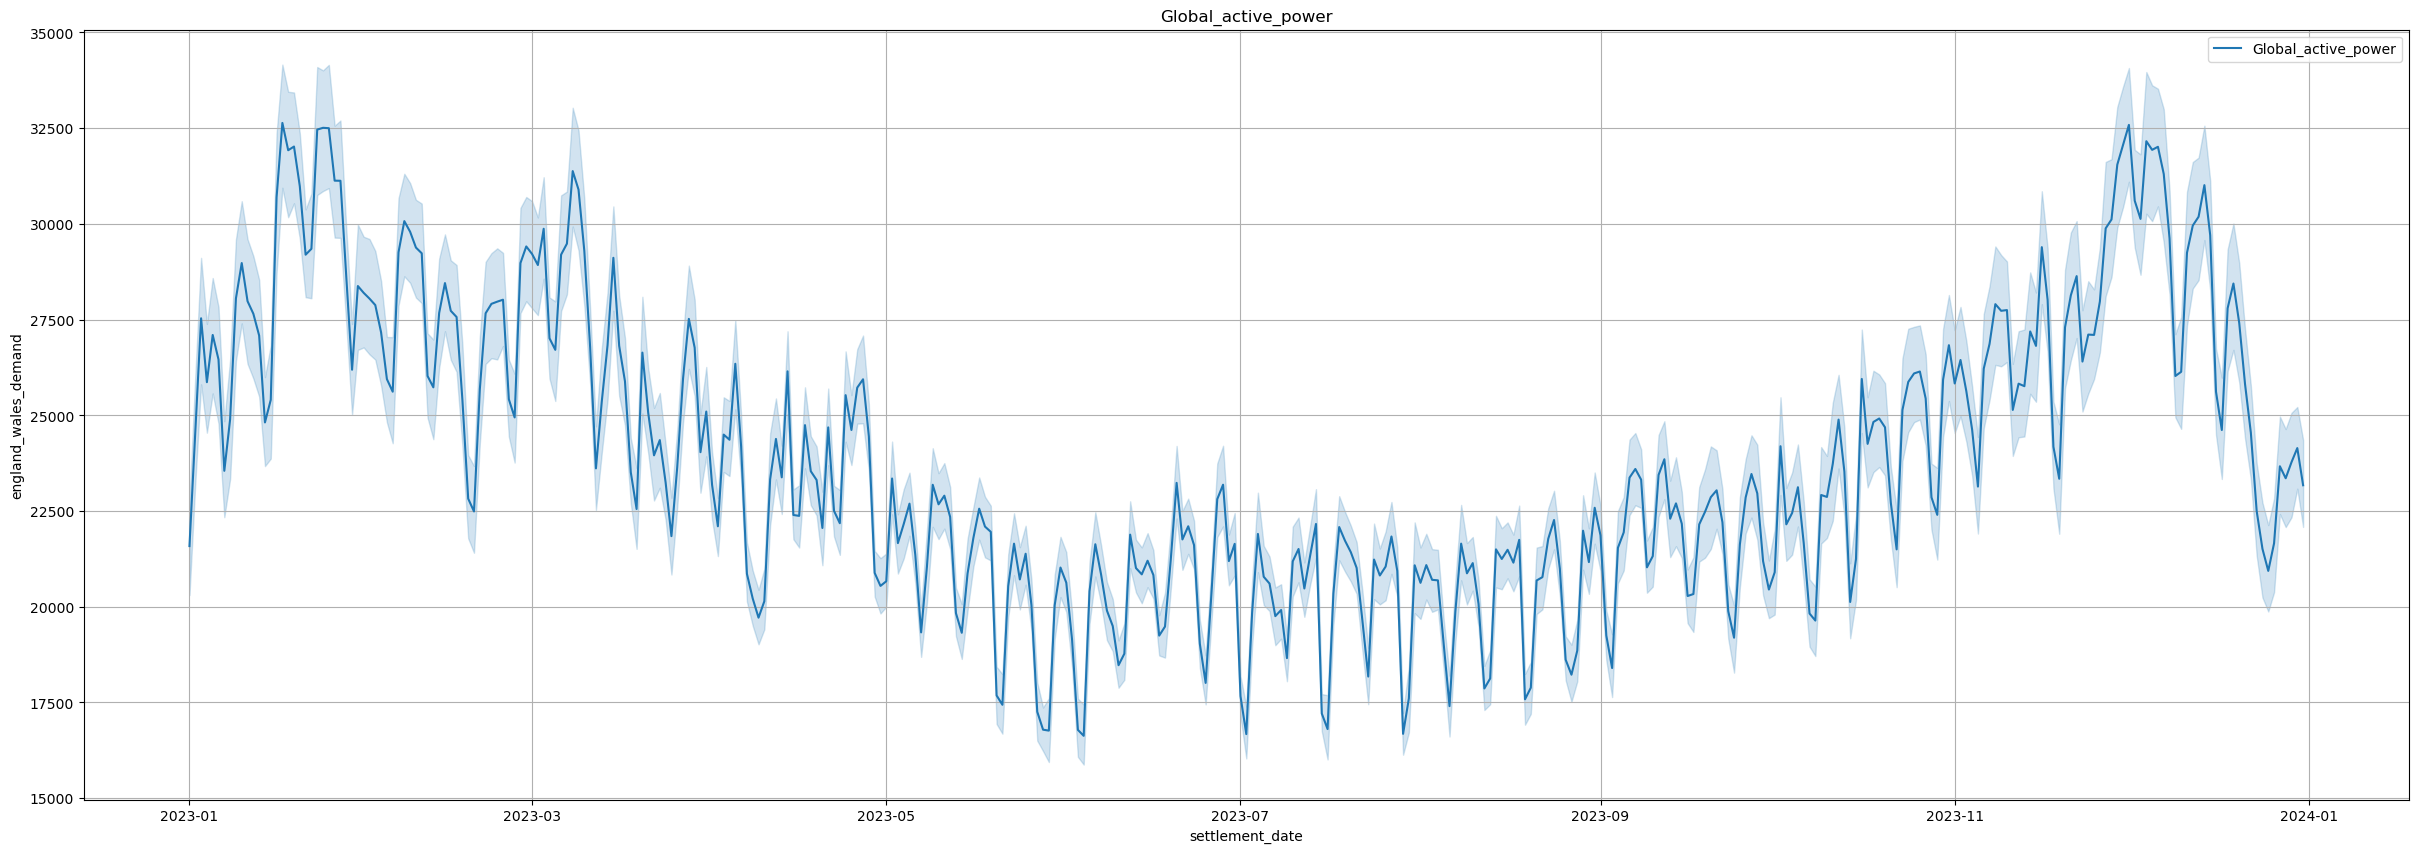

In [136]:
plt.figure(figsize=(30, 10))
sns.lineplot(x='settlement_date', y="england_wales_demand", data=data, label="Global_active_power") 
#plt.plot()
plt.title("Global_active_power")
plt.grid(True)
plt.legend()

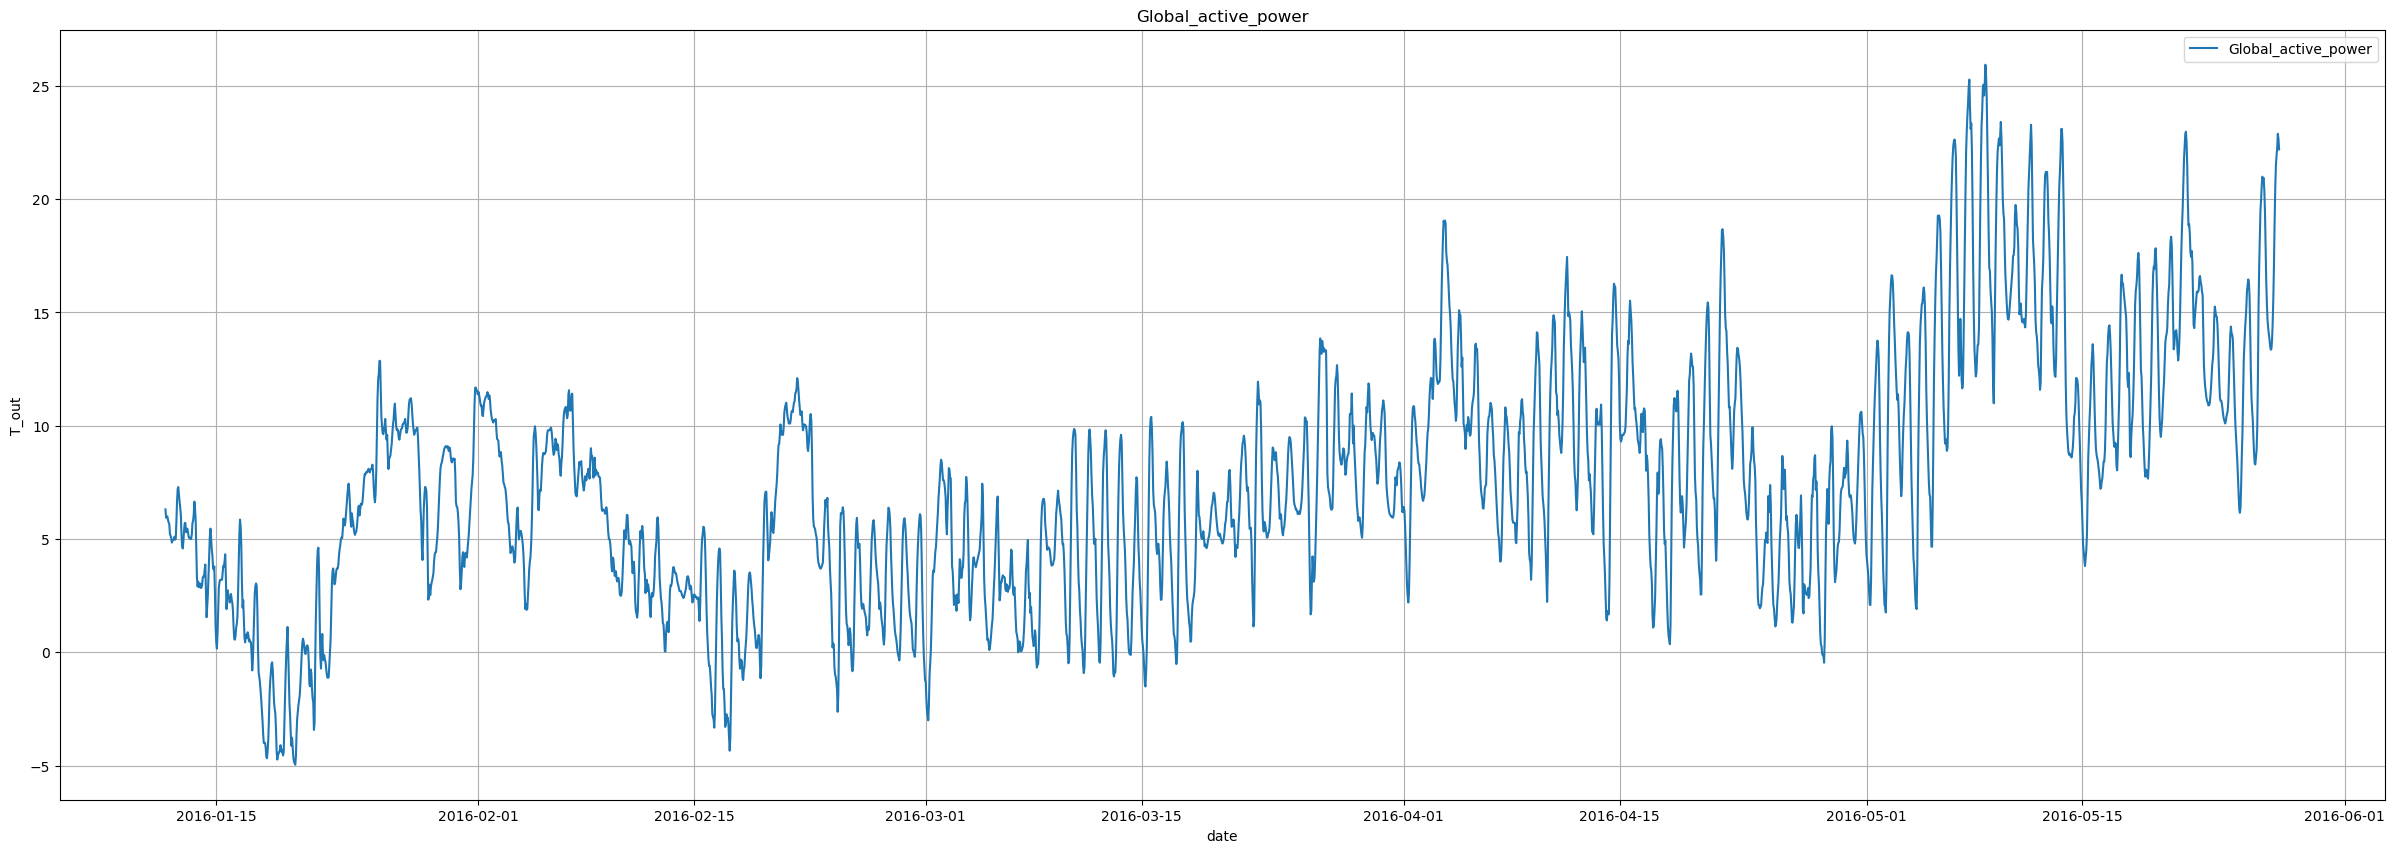

In [93]:
plt.figure(figsize=(30, 10))
sns.lineplot(x='date', y="T_out", data=hourly_averages, label="Global_active_power") 
plt.title("Global_active_power")
plt.grid(True)
plt.legend()

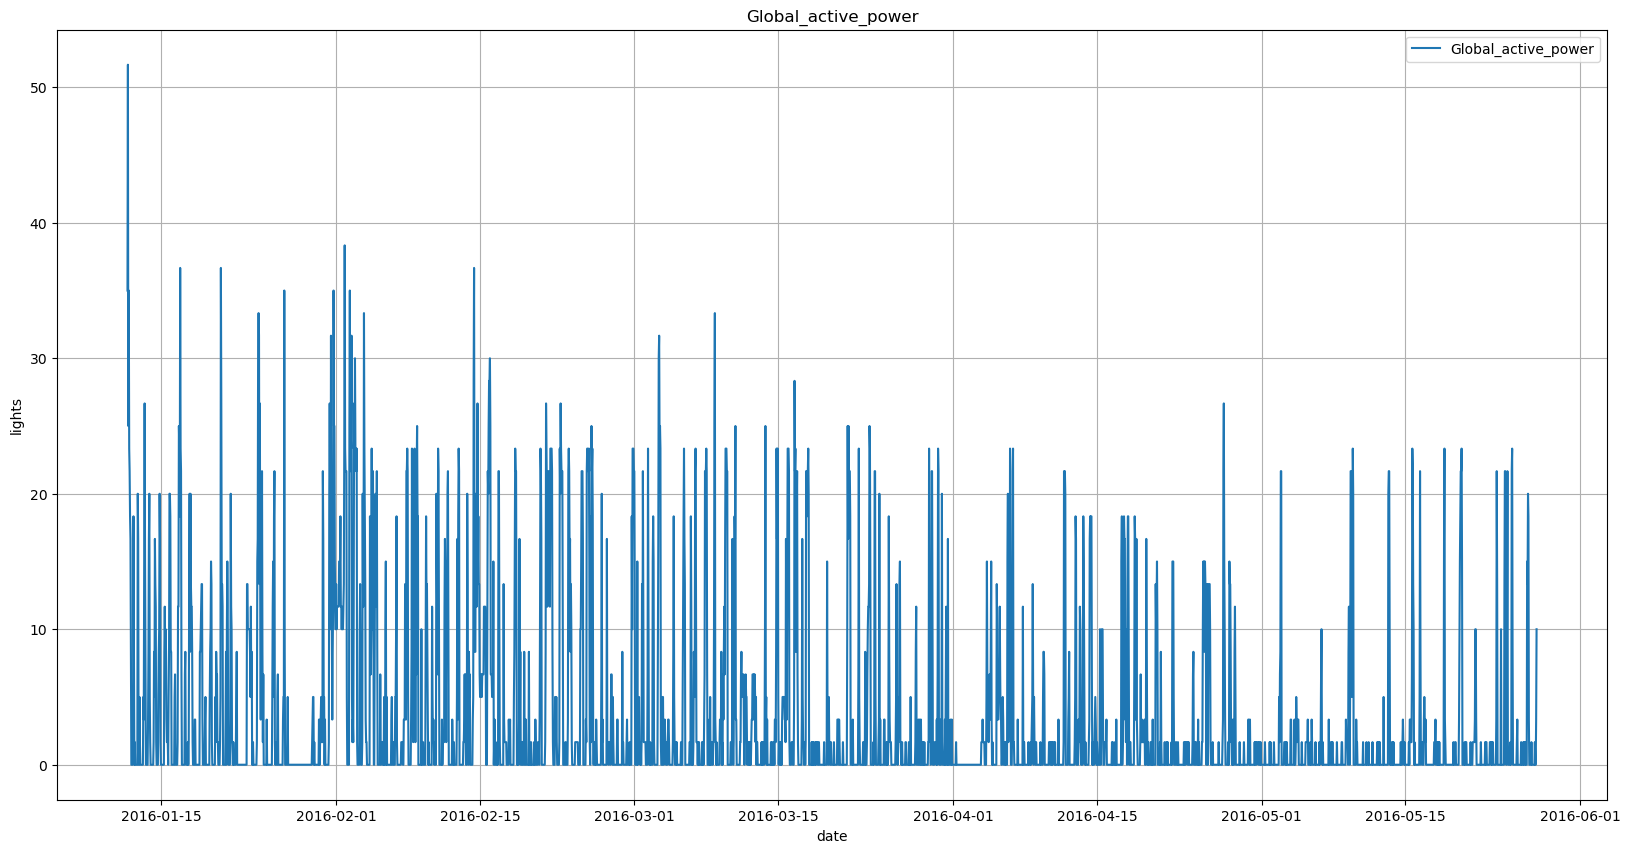

In [92]:
plt.figure(figsize=(20, 10))
#sns.lineplot(x='date', y="Appliances", data=data, label="Global_active_power") 
sns.lineplot(x='date', y="lights", data=hourly_averages, label="Global_active_power") 
plt.title("Global_active_power")
plt.grid(True)
plt.legend()